In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

In [3]:
path = "/Users/sabin/Documents/AI SCHOOL /assignments/Used Cars Dataset"

In [4]:
df = pd.read_csv(f'{path}/new_data.csv')

In [5]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck
1,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,pickup
2,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,pickup
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,pickup


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# 점수 산출
def scoreModel(model, X_train, X_valid, y_train, y_valid):
    '''
        R2 Score
    '''
    print("model : {}".format(model))
    print("train set accuracy: {:.3f}".format(model.score(X_train, y_train)))
    valid_score = model.score(X_valid, y_valid)
    print("valid set accuracy: {:.3f}".format(valid_score))
    return valid_score

### 찬영님덕에 preprocessed 된 데이터를 사용할 수 있었다..!😄

## 그래도 EDA는 추가로!

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129429 entries, 0 to 129428
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         129429 non-null  int64  
 1   year          129429 non-null  float64
 2   manufacturer  129429 non-null  object 
 3   model         129429 non-null  object 
 4   condition     129429 non-null  object 
 5   cylinders     129429 non-null  object 
 6   fuel          129429 non-null  object 
 7   odometer      129429 non-null  float64
 8   transmission  129429 non-null  object 
 9   drive         129429 non-null  object 
 10  type          129429 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.9+ MB


### Encoding
Get_dummies 는 너무 많은 메모리를 차지하니 pass. 
<br>
model이 이해할 수 있게 object 컬럼을 numeric으로 바꿔주자

In [9]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129429 entries, 0 to 129428
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         129429 non-null  int64  
 1   year          129429 non-null  float64
 2   manufacturer  129429 non-null  int64  
 3   model         129429 non-null  int64  
 4   condition     129429 non-null  int64  
 5   cylinders     129429 non-null  int64  
 6   fuel          129429 non-null  int64  
 7   odometer      129429 non-null  float64
 8   transmission  129429 non-null  int64  
 9   drive         129429 non-null  int64  
 10  type          129429 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 10.9 MB


In [11]:
df.isnull().sum().sum()

0

In [12]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
0,15000,2013.0,13,5049,0,5,2,128000.0,0,2,10
1,27990,2012.0,14,9879,2,6,2,68696.0,2,0,8
2,34590,2016.0,7,10019,2,5,2,29499.0,2,0,8
3,35000,2019.0,38,10774,0,5,2,43000.0,0,0,10
4,29990,2016.0,7,3251,2,5,2,17302.0,2,0,8


In [13]:
df['price'].describe()

count    1.294290e+05
mean     5.607621e+04
std      1.085401e+07
min      0.000000e+00
25%      5.600000e+03
50%      1.099500e+04
75%      2.299500e+04
max      3.736929e+09
Name: price, dtype: float64

In [14]:
df = df[df['price'] > 5000]
df = df[df['price'] < 25000]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71250 entries, 0 to 129427
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         71250 non-null  int64  
 1   year          71250 non-null  float64
 2   manufacturer  71250 non-null  int64  
 3   model         71250 non-null  int64  
 4   condition     71250 non-null  int64  
 5   cylinders     71250 non-null  int64  
 6   fuel          71250 non-null  int64  
 7   odometer      71250 non-null  float64
 8   transmission  71250 non-null  int64  
 9   drive         71250 non-null  int64  
 10  type          71250 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 6.5 MB


In [16]:
df.describe()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
count,71250.000000,71250.000000,71250.000000,71250.000000,71250.000000,71250.000000,71250.000000,7.125000e+04,71250.000000,71250.000000,71250.000000
mean,12473.893361,2009.282723,18.769853,6320.876744,0.999733,4.464407,1.946091,1.149965e+05,0.132730,0.816477,5.779930
std,5484.155598,9.034688,11.225118,3440.301915,1.162782,1.286605,0.443940,1.520876e+05,0.419891,0.769970,4.226628
min,5049.000000,1918.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7900.000000,2007.000000,10.000000,3474.000000,0.000000,3.000000,2.000000,7.446800e+04,0.000000,0.000000,0.000000
50%,11000.000000,2011.000000,16.000000,6165.000000,0.000000,5.000000,2.000000,1.082430e+05,0.000000,1.000000,8.000000
75%,16495.000000,2014.000000,30.000000,9344.000000,2.000000,6.000000,2.000000,1.443328e+05,0.000000,1.000000,9.000000
max,24999.000000,2022.000000,40.000000,12472.000000,5.000000,7.000000,4.000000,1.000000e+07,2.000000,2.000000,12.000000


<AxesSubplot:>

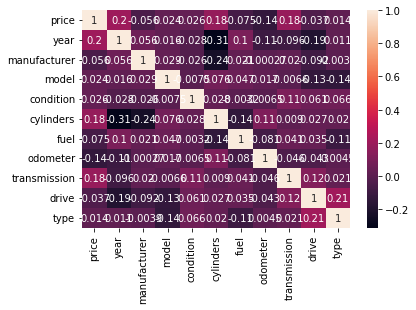

In [17]:
sns.heatmap(df.corr(), annot=True)

## modeling

In [18]:
target_name = 'price'
y = df[target_name]
X = df.drop([target_name], axis=1)

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

X_train shape: (57000, 10)
y_train shape: (57000,)
X_valid shape: (14250, 10)
y_valid shape: (14250,)


In [89]:
scaler = StandardScaler()
scaler.fit_transform(X_train, y_train)
scaler.fit_transform(X_valid, y_valid)


array([[ 0.41107057, -0.96331005, -1.76872155, ..., -0.31249662,
         0.25062429,  0.76701432],
       [ 0.63622166,  1.01157665,  0.97008155, ..., -0.31249662,
         0.25062429,  0.76701432],
       [-0.48953375, -0.42470458,  1.00480165, ..., -0.31249662,
        -1.05232945, -1.35658973],
       ...,
       [ 0.41107057,  1.01157665,  0.96658037, ..., -0.31249662,
        -1.05232945,  0.76701432],
       [ 0.7487972 , -1.05307762, -0.78693052, ..., -0.31249662,
         0.25062429,  0.76701432],
       [ 0.41107057,  0.56273877, -1.70511667, ..., -0.31249662,
         0.25062429,  0.76701432]])

### RandomForestRegressor

In [90]:
random_forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
random_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [91]:
scoreModel(random_forest, X_train, X_valid, y_train, y_valid)

model : RandomForestRegressor(max_depth=5, random_state=0)
train set accuracy: 0.538
valid set accuracy: 0.540


0.5397771215883356

### DecisionTreeRegressor

In [92]:
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [93]:
scoreModel(decision_tree, X_train, X_valid, y_train, y_valid)

model : DecisionTreeRegressor(max_depth=5, random_state=0)
train set accuracy: 0.504
valid set accuracy: 0.507


0.5072101689374724

### XGBoost

In [94]:
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, reg_lambda=0.5, random_state=0, n_jobs=-1, objective='reg:squarederror')
xgb_reg.fit(X_train, y_train) 
scoreModel(xgb_reg, X_train, X_valid, y_train, y_valid)

model : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=0.5, ...)
train set accuracy: 0.742
valid set accuracy: 0.730


0.7301730934015278

In [95]:
xgb_clf = xgb.XGBRegressor() 
parameters = {'n_estimators': [60, 100, 120, 140], 
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(X_train, y_train)

In [96]:
print(f"best params : {xgb_reg.best_params_}")
print(f"best score : {xgb_reg.best_score_}")
print(f"valid score : {xgb_reg.score(X_valid, y_valid)}")

best params : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.5}
best score : 0.7849664294554921
valid score : 0.786862786702639


In [97]:
xgb_reg.best_estimator_.feature_names_in_


array(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type'], dtype='<U12')

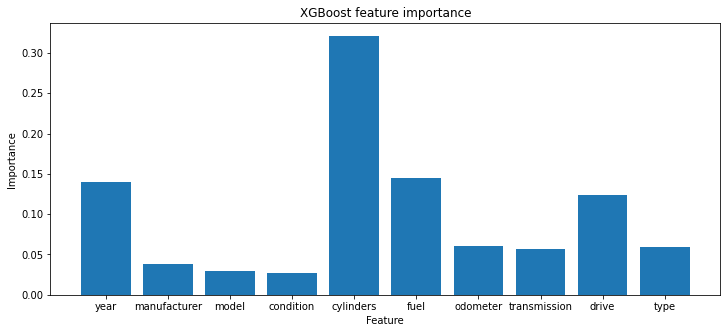

In [98]:
fig = plt.figure(figsize = (12, 5))

plt.bar(xgb_reg.best_estimator_.feature_names_in_, xgb_reg.best_estimator_.feature_importances_)

plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost feature importance")
plt.show()